<a href="https://colab.research.google.com/github/fsoria/Machine-Learning-Prediction-bank-churn/blob/main/Actividad_practica_AlgoritmoML_MVP_Soria_Fernanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presentación del problema

**Contexto comercial**

El sector bancario es altamente competitivo y la retención de clientes es fundamental. Adquirir nuevos clientes es más costoso que retener a los existentes.

**Problema comercial**

Existe una tasa de abandono de clientes que puede impactar negativamente la rentabilidad del banco. Es necesario entender las causas de este abandono para tomar medidas preventivas.

**Objetivo analítico**

El objetivo principal es comprender que factores influyen en la decisión de un cliente de abandonar el banco. Esto permitirá a la institución financiera tomar medidas para retener a sus clientes y reducir las pérdidas.

**Hipotesis**

*   Hipótesis 1: Los clientes con un menor límite de crédito son más propensos a abandonar el banco.
*   Hipótesis 2: Los clientes que realizan un menor número de transacciones son más propensos a abandonar el banco en comparación con aquellos que realizan más transacciones.
*   Hipótesis 3: Los clientes con menor cantidad de productos bancarios tienen una mayor probabilidad de abandonar el banco.




#Metadatos

Dataset: https://github.com/fsoria/Machine-Lerarning-Prediction-bank-churn-II/blob/main/BankChurners.csv

Fuente: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data

**Descripcion de variables**


*   **CLIENTNUM**: Número de cliente (identificador único)
*   **Customer_Age**: Edad del cliente en años.
*   **Gender**: Género del cliente (Masculino o Femenino).
*   **Dependent_count**: Número de personas que dependen del cliente.
*   **Education_Level**: Nivel de educación del cliente.
*   **Marital_Status**: Estado civil del cliente.
*   **Income_Category**: Categoría de ingresos anuales del cliente.
*   **Card_Category**: Tipo de tarjeta de crédito del cliente.
*   **Months_on_book**: Número de meses que el cliente ha sido cliente del banco.
*   **Total_Relationship_Count**: Número total de productos que el cliente tiene con el banco.
*   **Months_Inactive_12_mon**: Número de meses que el cliente ha estado inactivo en los últimos 12 meses.
*   **Contacts_Count_12_mon**: Número de veces que el cliente ha contactado al banco en los últimos 12 meses.
*   **Credit_Limit**: Límite de crédito de la tarjeta de crédito del cliente.
*   **Total_Revolving_Bal**: Saldo rotatorio total en la tarjeta de crédito del cliente.
*   **Avg_Open_To_Buy**: Promedio de línea de crédito disponible para el cliente.
*   **Total_Amt_Chng_Q4_Q1**: Cambio en el monto total de transacciones entre el cuarto trimestre y el primer trimestre.
*   **Total_Trans_Amt**: Monto total de transacciones realizadas por el cliente en los últimos 12 meses.
*   **Total_Trans_Ct**: Número total de transacciones realizadas por el cliente en los últimos 12 meses.
*   **Total_Ct_Chng_Q4_Q1**: Cambio en el número total de transacciones entre el cuarto trimestre y el primer trimestre.
*   **Avg_Utilization_Ratio**: Tasa promedio de utilización del crédito (saldo rotatorio total / límite de crédito).
*   **Attrition_Flag**: Indica si el cliente ha abandonado el banco (Attrited Customer) o no (Existing Customer).


#Transformacion de datos

**Principales Librerías**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


**Importación de datos**

In [2]:
url = "https://raw.githubusercontent.com/fsoria/Machinge-Lerarning---Bank-Churners-II/refs/heads/main/BankChurners.csv"
dataset = pd.read_csv(url)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [5]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,0.0
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,NaN
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,NaN
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,NaN
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,NaN
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,NaN
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,NaN


In [6]:
dataset.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


**Transformación y limpieza de datos**

In [7]:
dataset['Unnamed: 21'].unique()

array([nan])

In [8]:
dataset.drop(columns=['Unnamed: 21'], inplace=True)


#Análisis exploratorio de datos

###Analisis general

**Abandono de clientes**

In [64]:
attrition_counts = dataset.Attrition_Flag.value_counts()

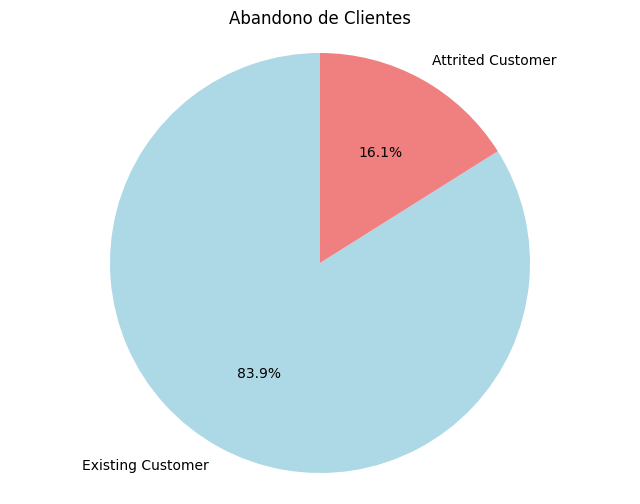

In [68]:
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Abandono de Clientes')
plt.axis('equal')
plt.show()

**Edad de clientes**

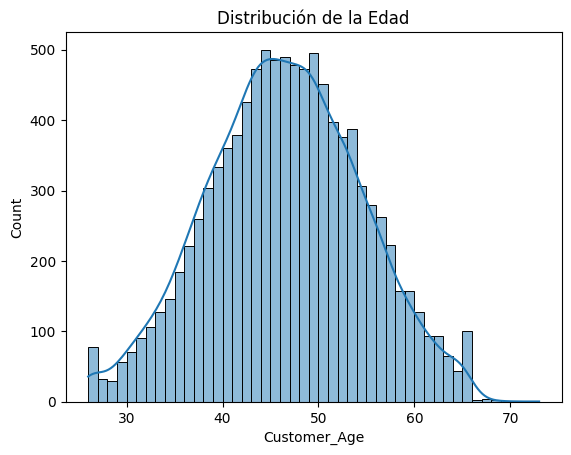

In [9]:
sns.histplot(dataset['Customer_Age'], kde=True)
plt.title("Distribución de la Edad")
plt.show()

El gráfico de distribucion de edades nos muestra que la mayor acumulacion de edades se concentra entre el rango de 30 y 50 años. A partir de los 50 años la cantidad de clientes disminuye.

In [10]:
dataset.Customer_Age.describe()

,Customer_Age
count,10127.000000
mean,46.325960
std,8.016814
min,26.000000
25%,41.000000
50%,46.000000
75%,52.000000
max,73.000000


Hacemos un análisis de acuerdo a las medidas descriptivas a traves de .describe(), con el objetivo identificar outliers, verificar la razonabilidad de los datos y obtener la edad promedio de 46 años.

**Categorías de ingresos de clientes**

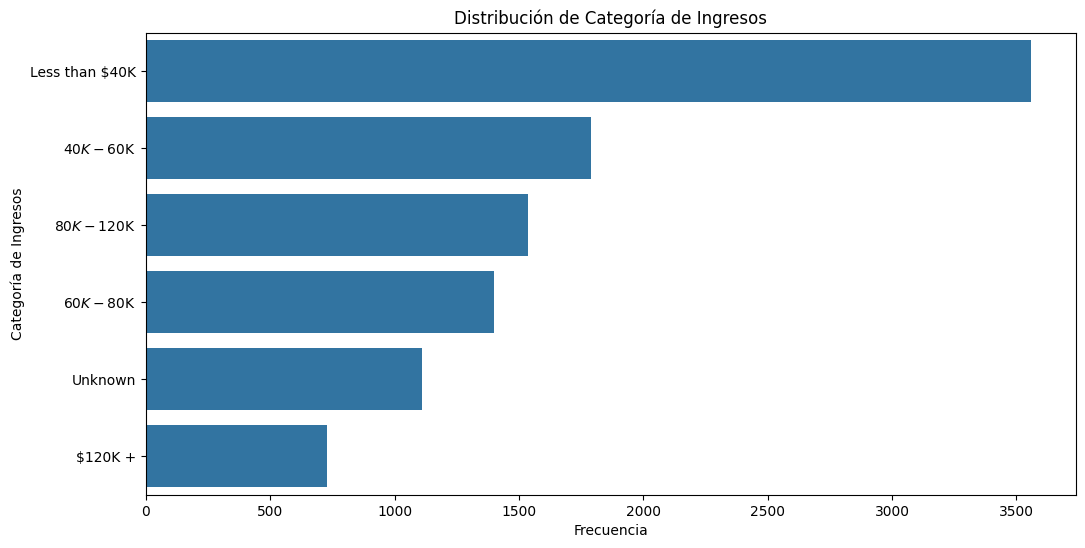

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Income_Category', order=dataset['Income_Category'].value_counts().index)
plt.title("Distribución de Categoría de Ingresos")
plt.xlabel("Frecuencia")
plt.ylabel("Categoría de Ingresos")
plt.show()

El gráfico muestra la distribución de las categorías de ingresos agrupadas en 6 grandes grupos. Se observa que la mayor concentración de clientes se encuentra en la categoría "Less than $40K". Le sigue en frecuencia la categoría "$40K - $60K", mostrando una distribución descendente en las demás categorías.

**Cantidad de productos por clientes**

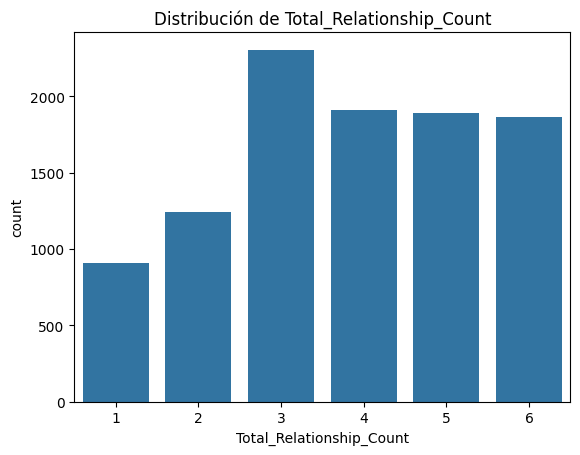

In [12]:
sns.countplot(x='Total_Relationship_Count', data=dataset)
plt.title('Distribución de Total_Relationship_Count')
plt.show()

El gráfico muestra la distribución de la cantidad de productos bancarios por cliente. Se observa que la mayoría de los clientes tienen 3 productos, representando la mayor concentración. Las cantidades de clientes con 4, 5 y 6 productos son menores, pero similares entre sí.

**Límite de credito por cliente**

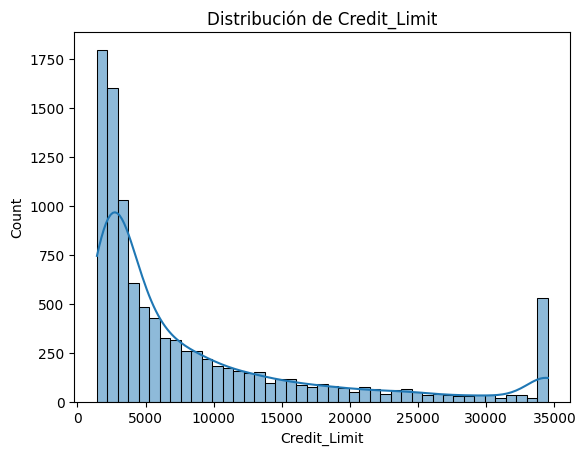

In [13]:
sns.histplot(dataset['Credit_Limit'], kde=True)
plt.title("Distribución de Credit_Limit")
plt.show()

El histograma muestra una distribución del límite de crédito con la mayoría de clientes en límites bajos. Se observa un pico de frecuencia en 1750 clientes para límites de crédito menores a 5000, luego decrece y remonta en límites mayores a 35000 pero para una menor cantidad de clientes.

**Cantidad de transacciones por clientes**

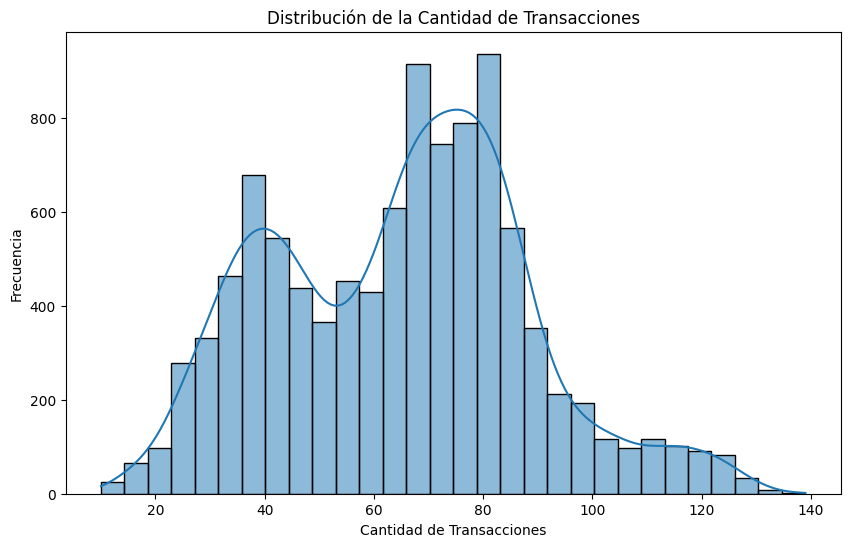

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Total_Trans_Ct'], bins=30, kde=True)
plt.title('Distribución de la Cantidad de Transacciones')
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('Frecuencia')
plt.show()

El gráfico muestra que la mayoría de los clientes realizan entre 40 y 80 transacciones. La distribución indica que pocos clientes realizan menos de 20 o más de 120 transacciones.

**Cantidad de meses inactivos por cliente**

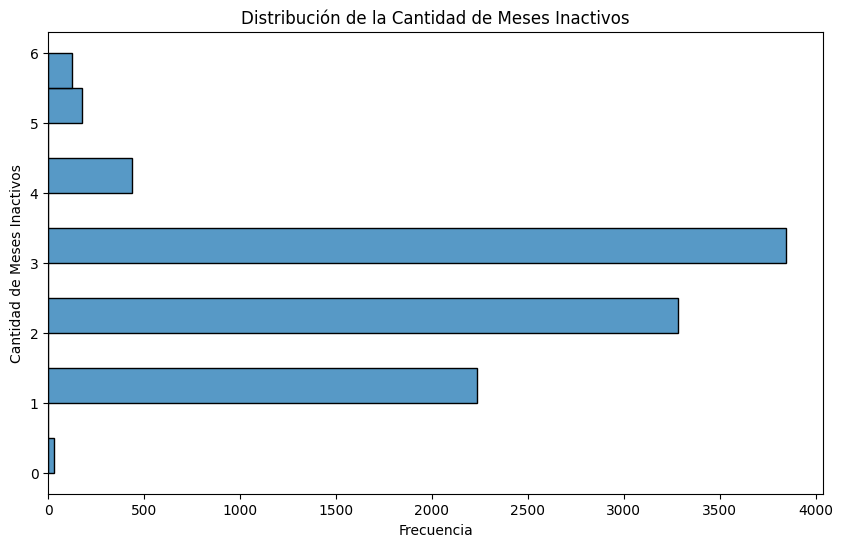

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(y='Months_Inactive_12_mon', data=dataset, bins=12)
plt.title('Distribución de la Cantidad de Meses Inactivos')
plt.ylabel('Cantidad de Meses Inactivos')
plt.xlabel('Frecuencia')
plt.show()

El grafico muestra que La mayoría de clientes tienen entre 2 y 3 meses de inactividad en los últimos 12 meses. Hay un pico en la frecuencia de clientes que tienen 3 meses de inactividad. Pocos clientes estuvieron inactivos por un mes o más de 4 meses.

###Analisis especifico: Clientes que abandonaron el banco

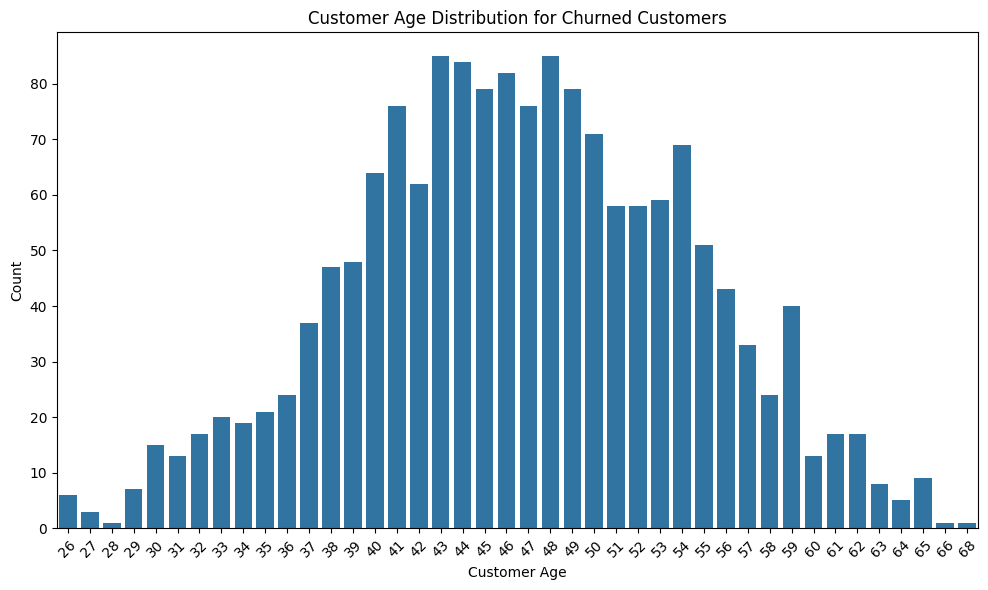

In [16]:
churned_customers = dataset[dataset['Attrition_Flag'] == 'Attrited Customer']

plt.figure(figsize=(10, 6))
sns.countplot(data=churned_customers, x='Customer_Age')
plt.title('Customer Age Distribution for Churned Customers')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

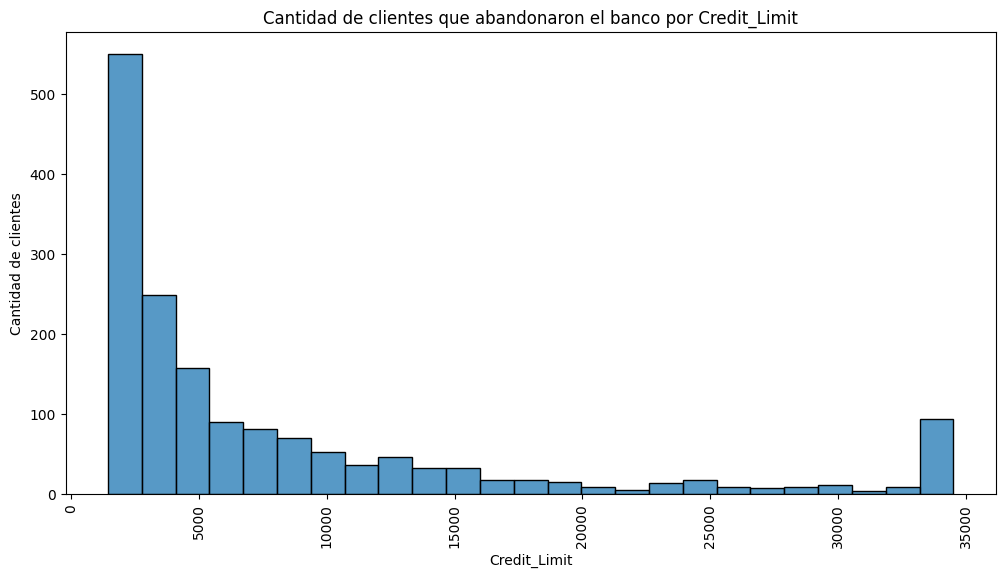

In [17]:
churned_customers = dataset[dataset['Attrition_Flag'] == 'Attrited Customer']

credit_limits = churned_customers['Credit_Limit'].unique()


plt.figure(figsize=(12, 6))
sns.histplot(data=churned_customers, x='Credit_Limit')
plt.title('Cantidad de clientes que abandonaron el banco por Credit_Limit')
plt.xlabel('Credit_Limit')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=90)
plt.show()

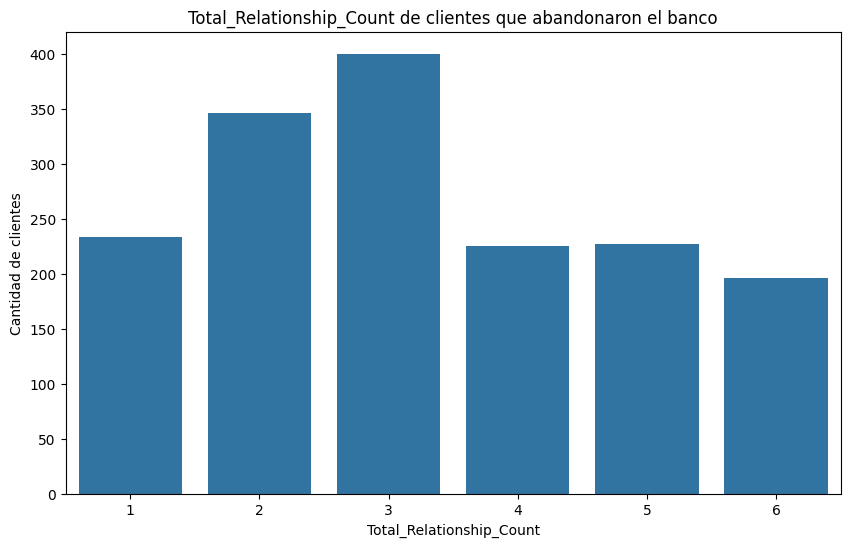

In [18]:
churned_customers = dataset[dataset['Attrition_Flag'] == 'Attrited Customer']

plt.figure(figsize=(10, 6))
sns.countplot(data=churned_customers, x='Total_Relationship_Count')
plt.title('Total_Relationship_Count de clientes que abandonaron el banco')
plt.xlabel('Total_Relationship_Count')
plt.ylabel('Cantidad de clientes')
plt.show()

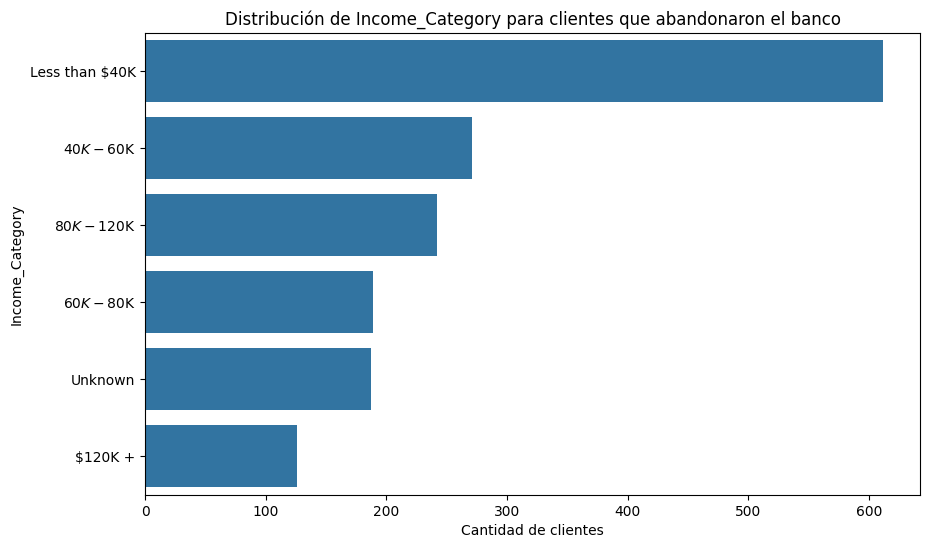

In [19]:
churned_customers = dataset[dataset['Attrition_Flag'] == 'Attrited Customer']

plt.figure(figsize=(10, 6))
sns.countplot(data=churned_customers, y='Income_Category', order=churned_customers['Income_Category'].value_counts().index)
plt.title('Distribución de Income_Category para clientes que abandonaron el banco')
plt.ylabel('Income_Category')
plt.xlabel('Cantidad de clientes')
plt.show()

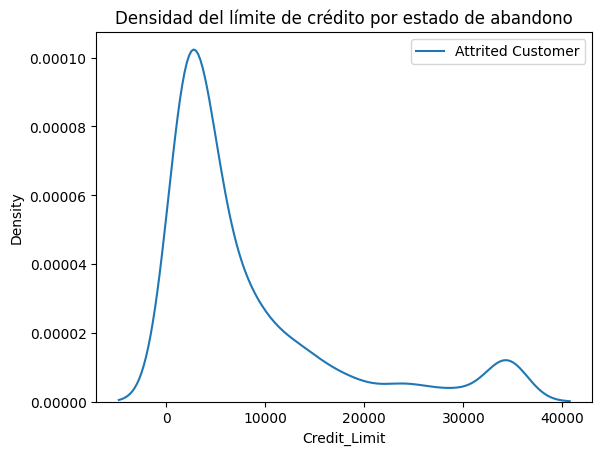

In [20]:
sns.kdeplot(dataset[dataset['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit'], label='Attrited Customer')
plt.title('Densidad del límite de crédito por estado de abandono')
plt.legend()
plt.show()

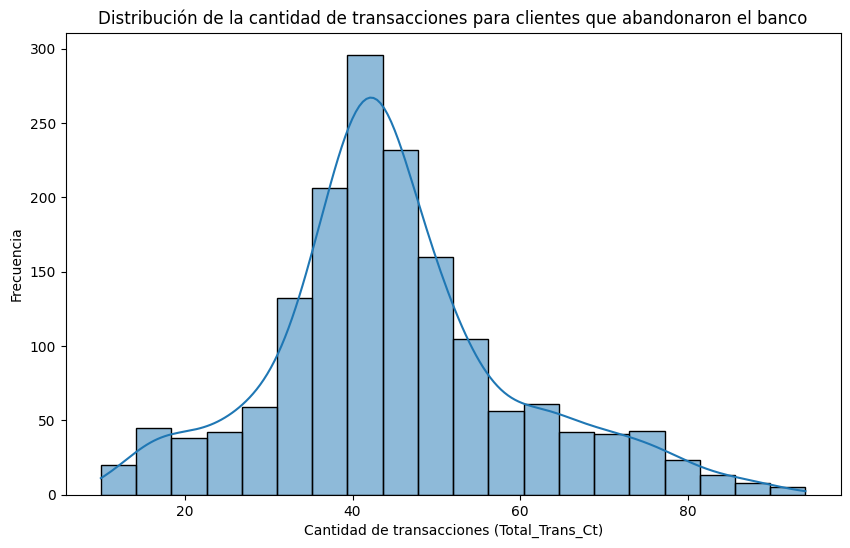

In [70]:
churned_customers = dataset[dataset['Attrition_Flag'] == 'Attrited Customer']

plt.figure(figsize=(10, 6))
sns.histplot(data=churned_customers, x='Total_Trans_Ct', bins=20, kde=True)
plt.title('Distribución de la cantidad de transacciones para clientes que abandonaron el banco')
plt.xlabel('Cantidad de transacciones (Total_Trans_Ct)')
plt.ylabel('Frecuencia')
plt.show()

##Análisis multivariado

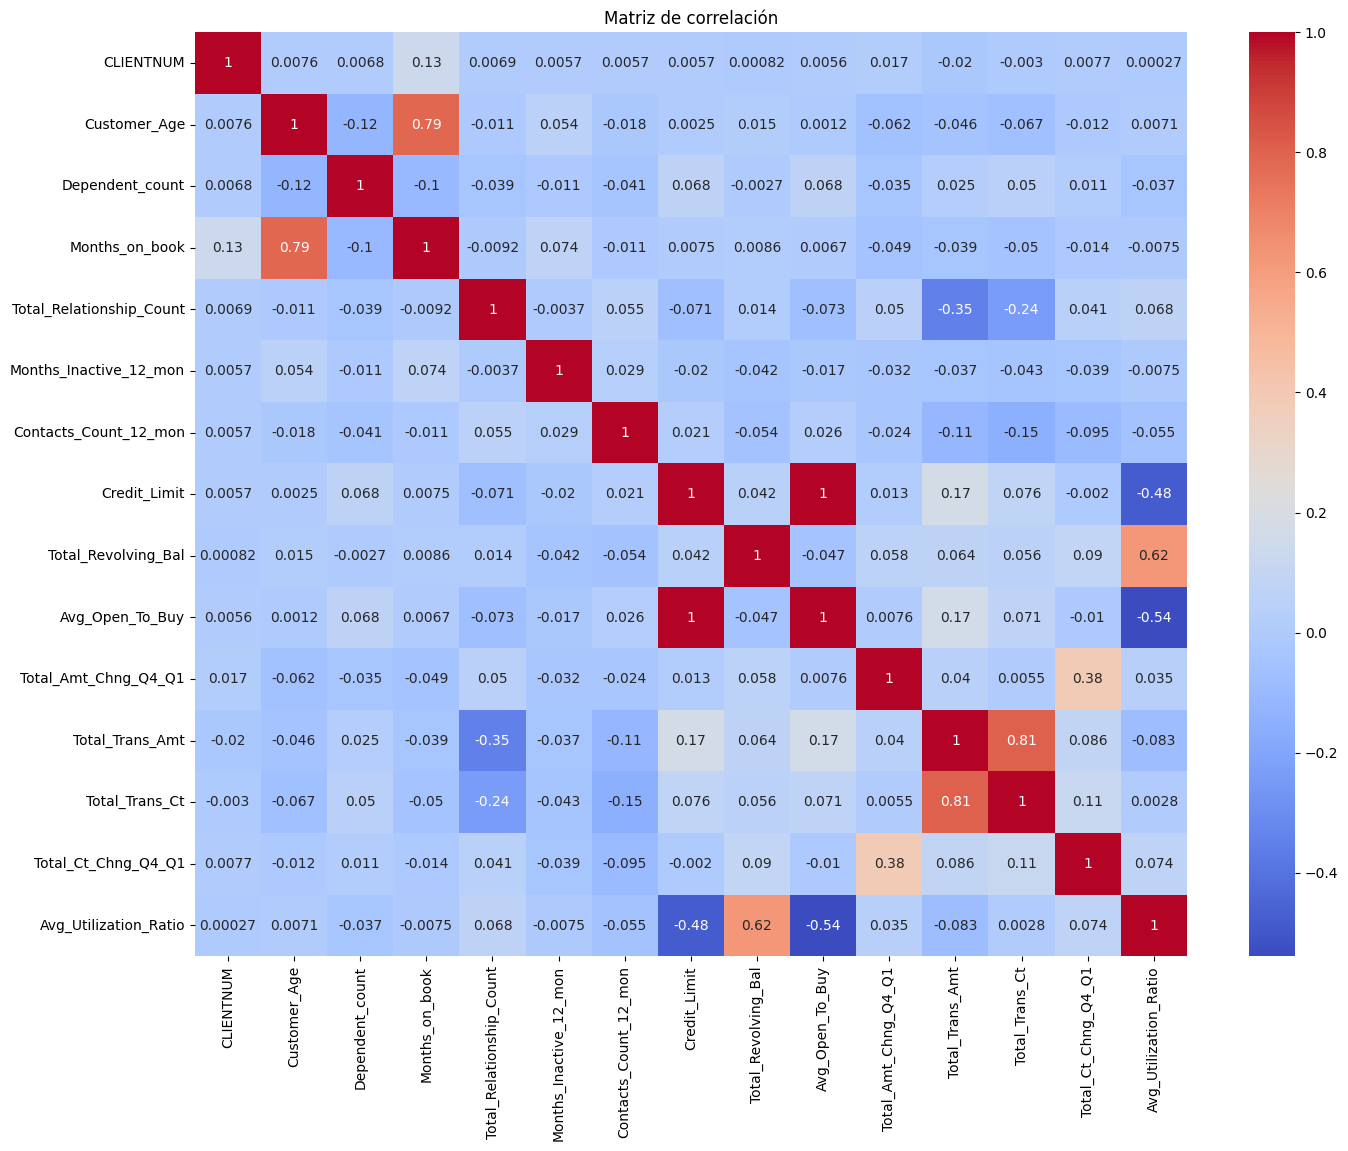

In [34]:
correlation_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(16, 12))  # Ajusta el ancho y alto según tus necesidades
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [40]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Llamada a la función con la indentación correcta
correlacion_Credit_Limit = cramers_v(dataset['Attrition_Flag'], dataset['Credit_Limit'])
correlacion_Total_Trans_Ct = cramers_v(dataset['Attrition_Flag'], dataset['Total_Trans_Ct'])
correlacion_Months_Inactive_12_mon = cramers_v(dataset['Attrition_Flag'], dataset['Months_Inactive_12_mon'])
correlacion_Income = cramers_v(dataset['Attrition_Flag'], dataset['Income_Category'])
correlacion_Card = cramers_v(dataset['Attrition_Flag'], dataset['Card_Category'])
correlacion_Gender = cramers_v(dataset['Attrition_Flag'], dataset['Gender'])
print(f"Cramer's V entre Attrition_Flag y Credit_Limit: {correlacion_Credit_Limit}")
print(f"Cramer's V entre Attrition_Flag y Total_Trans_Ct: {correlacion_Total_Trans_Ct}")
print(f"Cramer's V entre Attrition_Flag y Months_Inactive_12_mon: {correlacion_Months_Inactive_12_mon}")
print(f"Cramer's V entre Attrition_Flag y Income: {correlacion_Income}")
print(f"Cramer's V entre Attrition_Flag y Card: {correlacion_Card}")
print(f"Cramer's V entre Attrition_Flag y Gender: {correlacion_Gender}")

Cramer's V entre Attrition_Flag y Credit_Limit: 0.0
Cramer's V entre Attrition_Flag y Total_Trans_Ct: 0.47711469489007136
Cramer's V entre Attrition_Flag y Months_Inactive_12_mon: 0.19636626169347218
Cramer's V entre Attrition_Flag y Income: 0.027810633265167757
Cramer's V entre Attrition_Flag y Card: 0.0
Cramer's V entre Attrition_Flag y Gender: 0.03564467238464494


#Encoding de variables categóricas

In [49]:
label_encoder = LabelEncoder()

dataset_encoded = pd.get_dummies(dataset, columns=['Income_Category','Gender', 'Education_Level', 'Marital_Status', 'Card_Category', 'credit_limit_bins'], drop_first=True)


In [50]:
dataset_encoded.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,"credit_limit_bins_(8053.84, 14669.38]","credit_limit_bins_(14669.38, 21284.92]","credit_limit_bins_(21284.92, 27900.46]","credit_limit_bins_(27900.46, 34516.0]"
0,768805383,Existing Customer,45,3,39,5,1,3,12691.0,777,...,True,False,False,False,False,False,True,False,False,False
1,818770008,Existing Customer,49,5,44,6,1,2,8256.0,864,...,False,True,False,False,False,False,True,False,False,False
2,713982108,Existing Customer,51,3,36,4,1,0,3418.0,0,...,True,False,False,False,False,False,False,False,False,False
3,769911858,Existing Customer,40,4,34,3,4,1,3313.0,2517,...,False,False,True,False,False,False,False,False,False,False
4,709106358,Existing Customer,40,3,21,5,1,0,4716.0,0,...,True,False,False,False,False,False,False,False,False,False


In [51]:
dataset_encoded.dtypes


,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Dependent_count,int64
Months_on_book,int64
Total_Relationship_Count,int64
Months_Inactive_12_mon,int64
Contacts_Count_12_mon,int64
Credit_Limit,float64
Total_Revolving_Bal,int64


#Feature selection

In [52]:
X = dataset_encoded.drop(columns=['Attrition_Flag'])
y = dataset_encoded['Attrition_Flag']


#Split train test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Model selection

**Random Forest**

In [54]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_rf.predict(X_test)

# Evaluar el modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {precision}")

Precisión del modelo Random Forest: 0.9526159921026653


**Gradient Boosting**

In [55]:
modelo_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
modelo_gb.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_rf.predict(X_test)

# Evaluar el modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Gradient Boosting: {precision}")

Precisión del modelo Gradient Boosting: 0.9526159921026653


**Redes neuronales**

In [56]:
modelo_nn = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
modelo_nn.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_rf.predict(X_test)

# Evaluar el modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de Redes Neuronales: {precision}")

Precisión del modelo de Redes Neuronales: 0.9526159921026653


**XGBoost**

#Evaluacion final


In [62]:
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

Classification Report (Random Forest):
                   precision    recall  f1-score   support

Attrited Customer       0.93      0.77      0.84       496
Existing Customer       0.96      0.99      0.97      2543

         accuracy                           0.95      3039
        macro avg       0.94      0.88      0.91      3039
     weighted avg       0.95      0.95      0.95      3039

